In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

C:\Users\acer\AppData\Local\Temp\ipykernel_5828\453160725.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [10]:
# loading the data from csv file to Pandas DataFrame
data = pd.read_csv(r"c:\Users\acer\Downloads\Projects_Datasets\train.csv")

In [11]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
#Shape of Data
data.shape

(8523, 12)

In [13]:
#Checking About the Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are null Values in Item_Weight and Item_Outlet_Sales. 
So we need to deal with it.

In [15]:
#Filling Item_Weight with mean value
data["Item_Weight"].fillna(data["Item_Weight"].mean(),inplace=True)

In [16]:
modes = data.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=lambda x:x.mode()[0])
modes

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [17]:
mode_of_outlet_size = {"Grocery Store":"Small",
                       "Supermarket Type1":"Small",
                       "Supermarket Type2":"Medium",
                       "Supermarket Type3":"Medium"}
mode_of_outlet_size

{'Grocery Store': 'Small',
 'Supermarket Type1': 'Small',
 'Supermarket Type2': 'Medium',
 'Supermarket Type3': 'Medium'}

In [18]:
for i in range(len(data)):
    if pd.isnull(data.loc[i,"Outlet_Size"]):
        outlet_type= data.loc[i,"Outlet_Type"]
        data.loc[i,"Outlet_Size"] = mode_of_outlet_size.get(outlet_type,None)

In [19]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

We can see that low fat,LF Low Fat are belongs one class and also reg belongs Regular.

In [20]:
data.replace({"Item_Fat_Content":{"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"}},inplace=True)
data["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [21]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [22]:
data["Item_Type"].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Not all categories have substantial numbers. It looks like combining them can give better results

We will identify Item_Identifier i.e. the unique ID of each item, It starts with either FD, DR, NC. 
It's looks like Food, Drinks and Non Consumables. So Create a new column.

In [23]:
#Get the first two Characters of Id:            
data["Item_Type_Combined"] = data["Item_Identifier"].apply(lambda x:x[0:2])

#Rename them to more categories:
data["Item_Type_Combined"] = data["Item_Type_Combined"].map({"FD":"Food",
                                                               "NC":"Non-Consumable",
                                                               "DR":"Drinks"})
data['Item_Type_Combined'].value_counts()


Item_Type_Combined
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

Feature Engineering

Modify Item_Visibility column 
noticed that the minimum value here is 0, which makes no sense. Lets consider it like missing information and impute with it mean visibility of that product.

In [24]:
visibility_avg = round(data["Item_Visibility"].mean(),8)
visibility_avg
data["Item_Visibility"] = np.where(data["Item_Visibility"]==0,visibility_avg,data["Item_Visibility"])

In [25]:
data["Item_Visibility"].describe()

count    8523.000000
mean        0.070213
std         0.048742
min         0.003575
25%         0.033085
50%         0.062517
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [26]:
#Mark non-consumables as separate category in low_fat:
data.loc[data["Item_Type_Combined"]=="Non-Consumable","Item_Fat_Content"] = "Non-Edible"
data["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

Expoloratory Data Analysis


In [27]:
categorical = data.select_dtypes(include=['object'])
print(categorical.shape[1],"Categorical features in the dataset")
categorical.columns


8 Categorical features in the dataset


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Type_Combined'],
      dtype='object')

'Item_Identifier','Outlet_Identifier' are just ID. don't have any relation with the sales

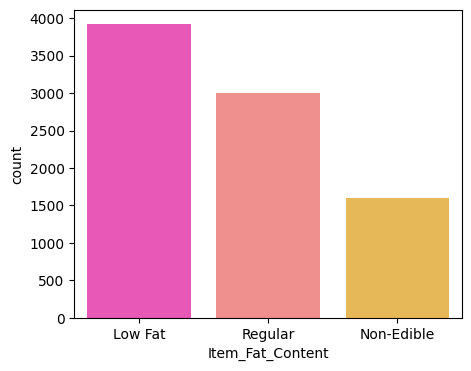

In [28]:
#Item Fat Content
plt.figure(figsize=(5,4))
sns.countplot(data=data,x="Item_Fat_Content",palette='spring')
plt.show()

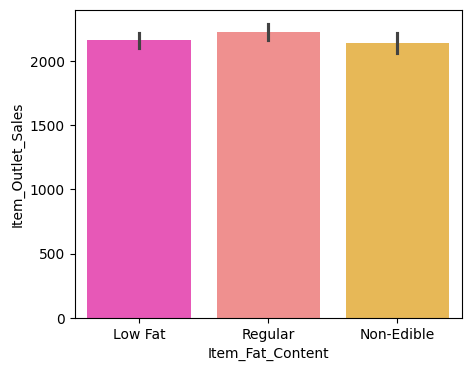

In [29]:
#Item Fat Content
plt.figure(figsize=(5,4))
sns.barplot(data=data,x="Item_Fat_Content",y="Item_Outlet_Sales",palette='spring')
plt.show()

As We can see Their are outliers present in Target Variables,
also is Positive Skewness. But We are using Random Forest and XG Boost models. 
They automatically handle them.

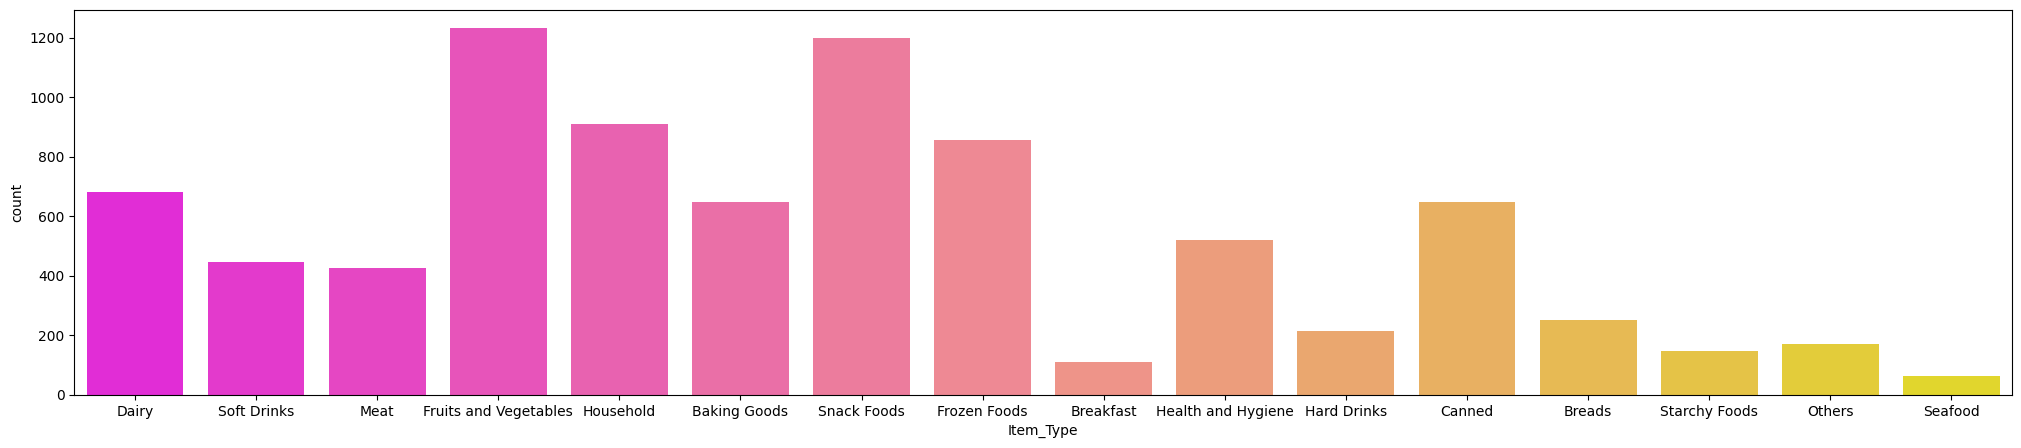

In [30]:
#Item Type
plt.figure(figsize=(25,5))
sns.countplot(x="Item_Type",data=data,palette="spring")
plt.show()

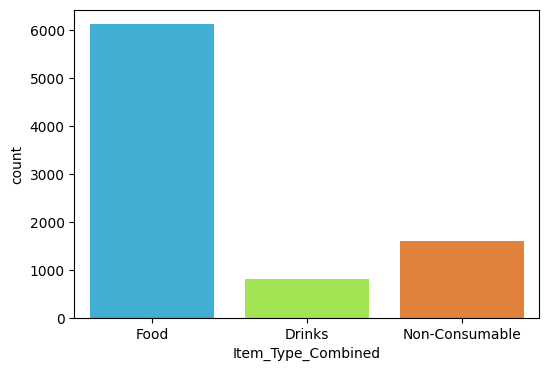

In [31]:
#Item_Type_Combined
plt.figure(figsize=(6,4))
sns.countplot(x="Item_Type_Combined",data=data,palette="turbo")
plt.show()

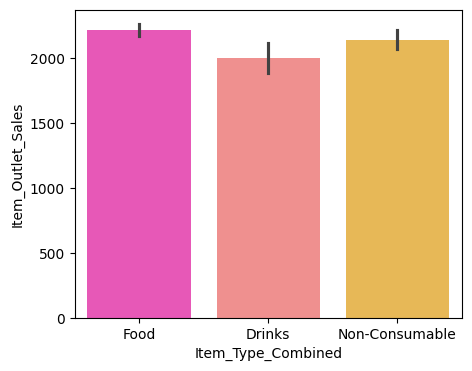

In [32]:
#Item Type Combined
plt.figure(figsize=(5,4))
sns.barplot(data=data,x="Item_Type_Combined",y="Item_Outlet_Sales",palette='spring')
plt.show()

Food is mostly avaiable but the sales of food,Non-Consumable and Drinks seems high

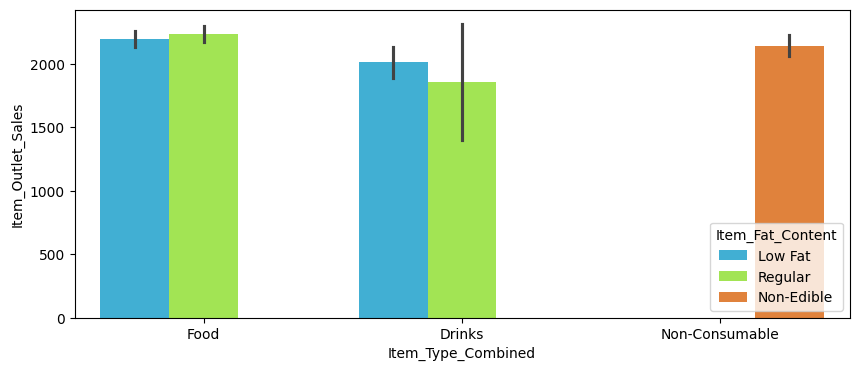

In [33]:
#Item Type Combined
plt.figure(figsize=(10,4))
sns.barplot(data=data,x="Item_Type_Combined",y="Item_Outlet_Sales",palette='turbo',hue="Item_Fat_Content")
plt.show()

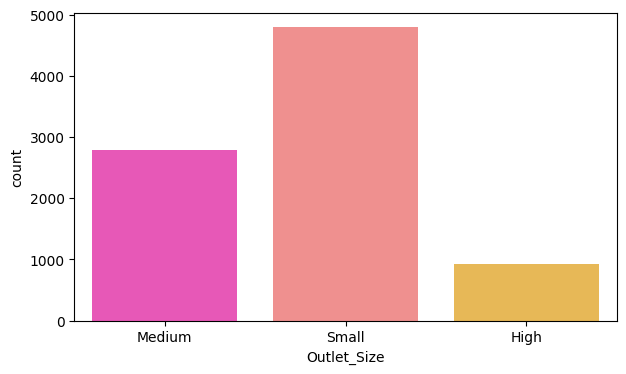

In [34]:
#Outlet Size
plt.figure(figsize=(7,4))
sns.countplot(data=data,x="Outlet_Size",palette='spring')
plt.show()

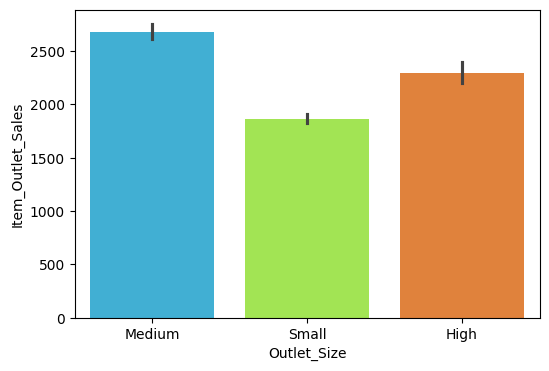

In [35]:
#Outlet Size
plt.figure(figsize=(6,4))
sns.barplot(data=data,x="Outlet_Size",y="Item_Outlet_Sales",palette='turbo')
plt.show()

Outlet are more in small size, but medium and high seller higher than small outlets.

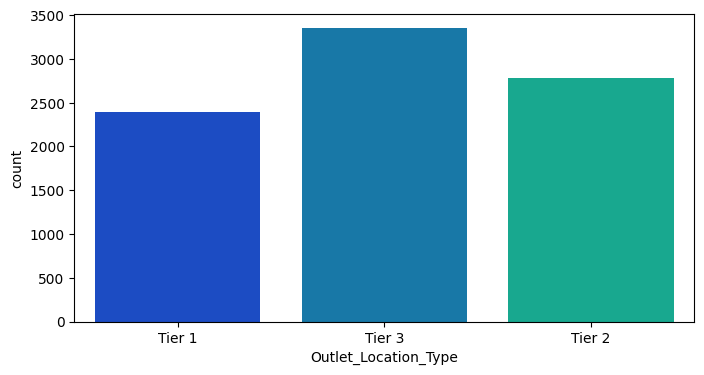

In [36]:
#Outlet Location Type 
plt.figure(figsize=(8,4))
sns.countplot(x="Outlet_Location_Type",data=data,palette="winter")
plt.show()

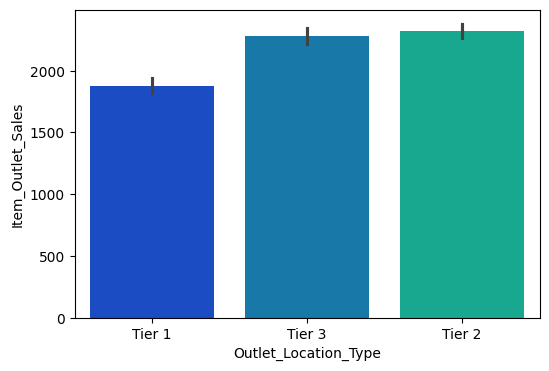

In [37]:
#Outlet Size
plt.figure(figsize=(6,4))
sns.barplot(data=data,x="Outlet_Location_Type",y="Item_Outlet_Sales",palette='winter')
plt.show()

The Outlets Sales tend to be high for Tier3 and Tier 2 Location Types
But we have maximum Outlets at only Tier3 Locations

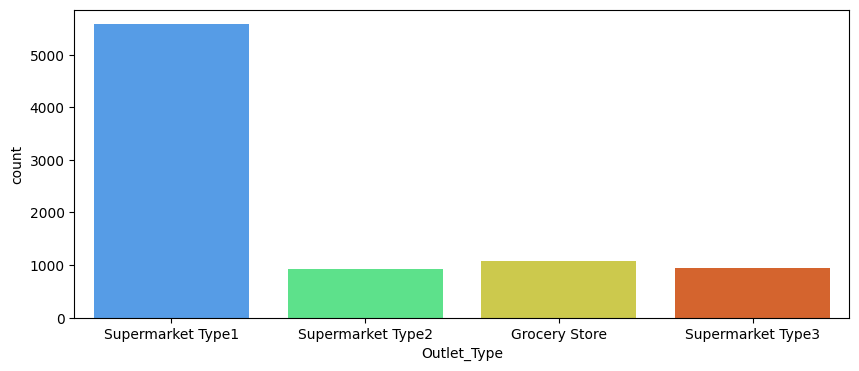

In [38]:
#Outlet Type
plt.figure(figsize=(10,4))
sns.countplot(data=data,x="Outlet_Type",palette='turbo')
plt.show()

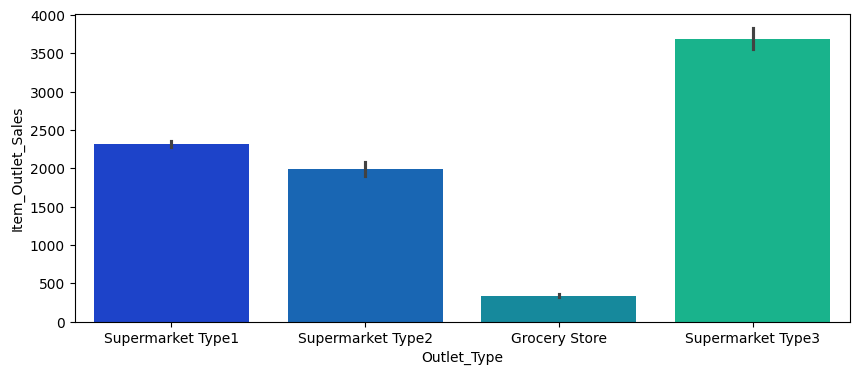

In [39]:
#Outlet Type
plt.figure(figsize=(10,4))
sns.barplot(data=data,x="Outlet_Type",y="Item_Outlet_Sales",palette='winter')
plt.show()

The Outlets are more of Supermarket Type 1
But sales are more on  Supermarket Type 3

Numerical Analysis

In [40]:
numerical_columns = list(data.select_dtypes(['int64',"Float64"]).columns)
numerical_features = pd.Index(numerical_columns)
numerical_features

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

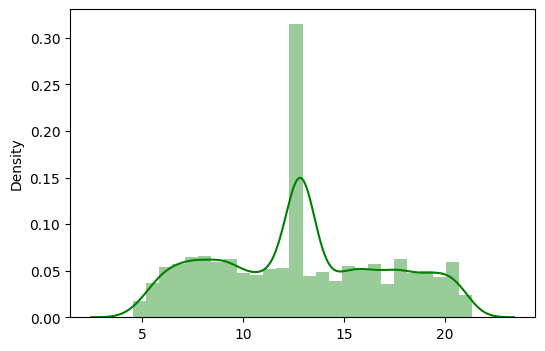

In [41]:
#Item Weight
plt.figure(figsize=(6,4))
sns.distplot(x=data["Item_Weight"],color="g")
plt.show()

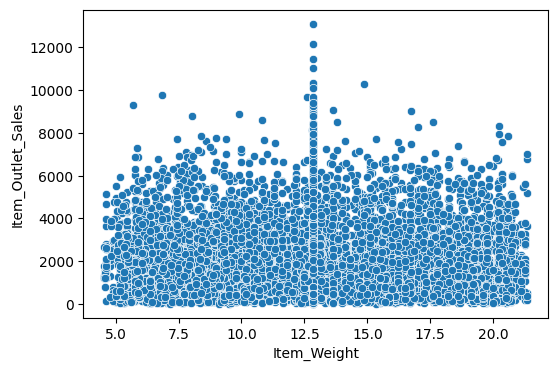

In [42]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=data,x="Item_Weight",y="Item_Outlet_Sales")
plt.show()

We have more products of weight around 12.5 and sell is maximum for that weight

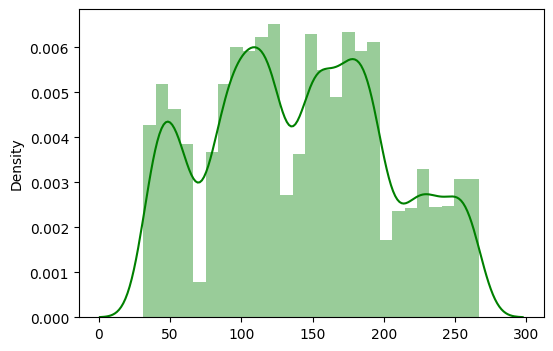

In [43]:
#Item Weight
plt.figure(figsize=(6,4))
sns.distplot(x=data["Item_MRP"],color="g")
plt.show()

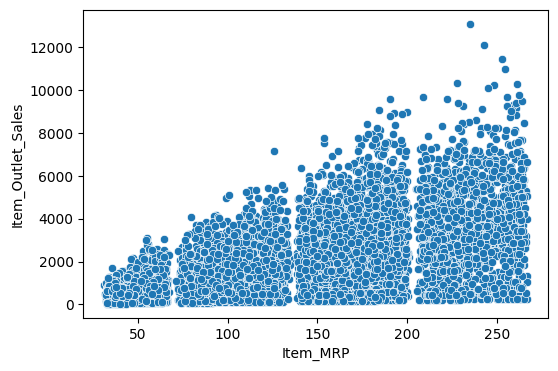

In [44]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=data,x="Item_MRP",y="Item_Outlet_Sales")
plt.show()

Text(0.5, 0, 'Item Visibility')

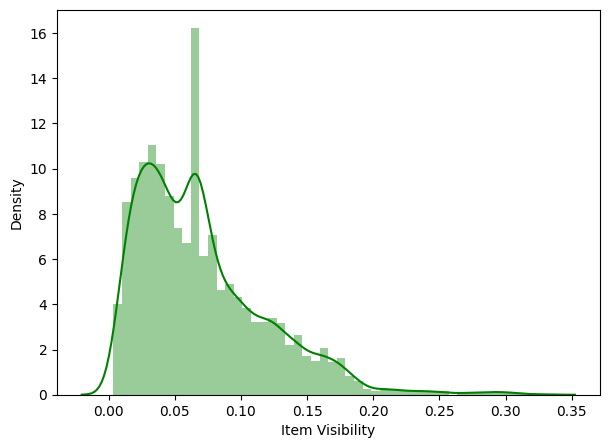

In [45]:
#Item Visibility
plt.figure(figsize=(7,5))
sns.distplot(x=data["Item_Visibility"],color="g")
plt.xlabel("Item Visibility")

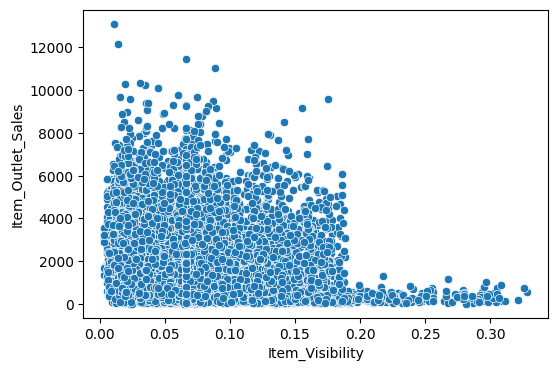

In [46]:
#Item Visibility
plt.figure(figsize=(6,4))
sns.scatterplot(data=data,x="Item_Visibility",y="Item_Outlet_Sales")
plt.show()

* We have Items having 0 to 0.2 is more
* Sales is more for items having Visibility 0 to 0.2
* Positive Skewness

We need to deal with it.


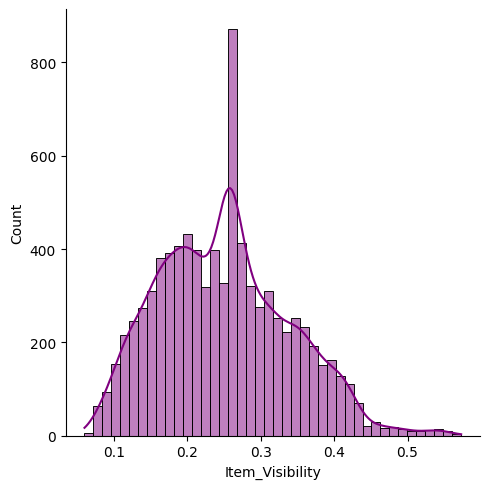

In [47]:
sns.displot(x=np.sqrt(data.Item_Visibility),color='purple',kde=True)
plt.show()

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

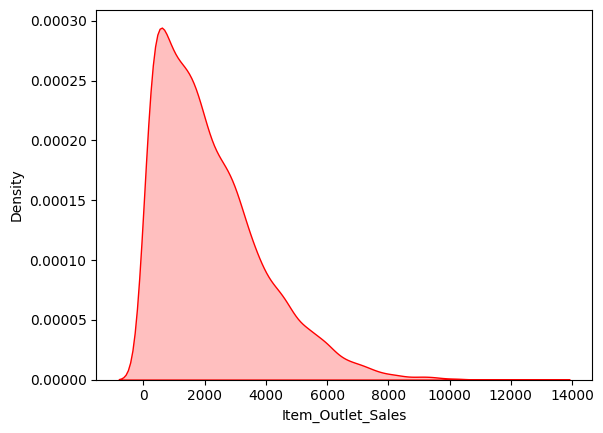

In [48]:
sns.kdeplot(data["Item_Outlet_Sales"],color="red",shade=True)

In [49]:
data["Item_Outlet_Sales"]= np.cbrt(data["Item_Outlet_Sales"])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

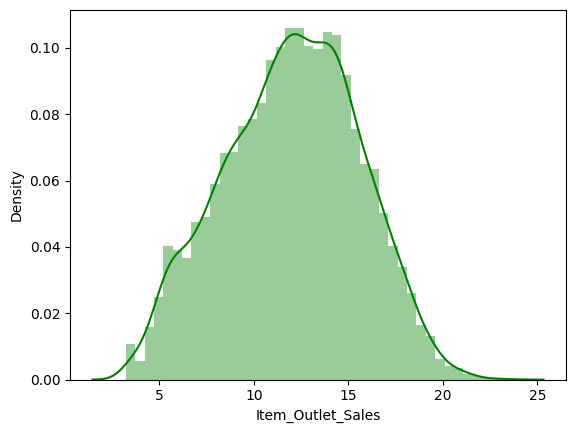

In [50]:
sns.distplot(data["Item_Outlet_Sales"],kde=True,color="g")

After applying cuberoot to the skewed Item_Outlet_Sales, we get almost normal distribution

Correlation Matrix


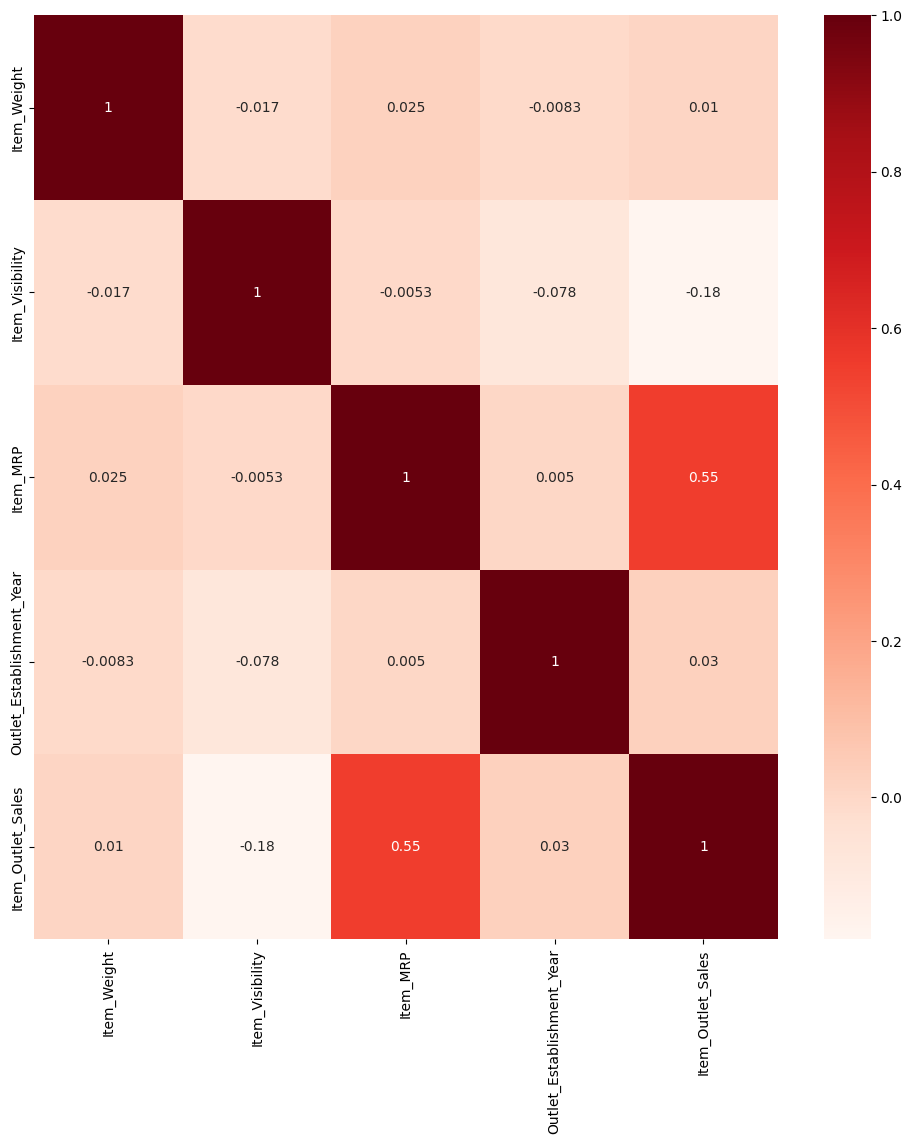

In [51]:
plt.figure(figsize=(12,12))
numerical_col = data.select_dtypes(include=["Float64","int64"])
sns.heatmap(numerical_col.corr(),annot=True,cmap="Reds")
plt.show()

* We can see them Item_Outlet_Sales is highly correlated with Item_MRP, if MRP Increses sales also increases

Feature Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Label = ['Item_Fat_Content',"Item_Type","Outlet_Identifier",'Outlet_Size','Outlet_Location_Type',"Outlet_Type","Item_Type_Combined"]
for i in Label:
    data[i]= le.fit_transform(data[i])

data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,15.515611,1
1,DRC01,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,7.625576,0
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,12.800240,1
3,FDX07,19.20,2,0.066132,6,182.0950,0,1998,2,2,0,9.013888,1
4,NCD19,8.93,1,0.066132,9,53.8614,1,1987,0,2,1,9.982319,2


In [53]:
data.drop(["Item_Identifier","Outlet_Establishment_Year"],axis=1,inplace = True)

In [54]:
X = data.drop(columns=["Item_Outlet_Sales"])
Y = data["Item_Outlet_Sales"]

In [55]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,9.300,0,0.016047,4,249.8092,9,1,0,1,1
1,5.920,2,0.019278,14,48.2692,3,1,2,2,0
2,17.500,0,0.016760,10,141.6180,9,1,0,1,1
3,19.200,2,0.066132,6,182.0950,0,2,2,0,1
4,8.930,1,0.066132,9,53.8614,1,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,0,2,1,1
8519,8.380,2,0.046982,0,108.1570,7,2,1,1,1
8520,10.600,1,0.035186,8,85.1224,6,2,1,1,2
8521,7.210,2,0.145221,13,103.1332,3,1,2,2,1


In [56]:
Y

0       15.515611
1        7.625576
2       12.800240
3        9.013888
4        9.982319
          ...    
8518    14.058233
8519     8.189661
8520    10.606219
8521    12.266265
8522     9.148444
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state =42)

Linear Regression

In [58]:
# Create LR Model

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [59]:
Y_pred = regressor.predict(X_test)

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#score variables
LR_MAE = round(mean_absolute_error(Y_test, Y_pred),2)
LR_MSE = round(mean_squared_error(Y_test, Y_pred),2)
LR_RMSE =np.sqrt(LR_MSE)
LR_R_2 = round(r2_score(Y_test, Y_pred),4)

print(f"Model score : {regressor.score(X_test,Y_test)}\n")
print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f"Root Mean Squared Error:{LR_RMSE}\n")
print(f" R^2 Score: {LR_R_2}\n")

Model score : 0.5721435585919843

 Mean Absolute Error: 1.86

 Mean Squared Error: 5.43

Root Mean Squared Error:2.3302360395462087

 R^2 Score: 0.5721



In [61]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1.0,max_iter=3000)
lasso.fit(X_train,Y_train)

Lasso(max_iter=3000)

In [62]:
lasso_Y_pred= lasso.predict(X_test)

In [63]:
#score variables
Lasso_MAE = round(mean_absolute_error(Y_test, lasso_Y_pred),2)
Lasso_MSE = round(mean_squared_error(Y_test, lasso_Y_pred),2)
Lasso_RMSE =np.sqrt(Lasso_MSE)
Lasso_R_2 = round(r2_score(Y_test, lasso_Y_pred),4)

print(f"Model score : {lasso.score(X_test,Y_test)}\n")
print(f" Mean Absolute Error: {Lasso_MAE}\n")
print(f" Mean Squared Error: {Lasso_MSE}\n")
print(f"Root Mean Squared Error:{Lasso_RMSE}\n")
print(f" R^2 Score: {Lasso_R_2}\n")

Model score : 0.42830121213389905

 Mean Absolute Error: 2.13

 Mean Squared Error: 7.26

Root Mean Squared Error:2.694438717061496

 R^2 Score: 0.4283



In [64]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
DT_Regressor = DecisionTreeRegressor()
DT_Regressor.fit(X_train,Y_train)

DecisionTreeRegressor()

In [65]:
DT_Y_Pred = DT_Regressor.predict(X_test)

In [66]:
#score variables
DT_MAE = round(mean_absolute_error(Y_test, DT_Y_Pred),2)
DT_MSE = round(mean_squared_error(Y_test, DT_Y_Pred),2)
DT_RMSE =np.sqrt(DT_MSE)
DT_R_2 = round(r2_score(Y_test, DT_Y_Pred),4)

print(f"Model score : {DT_Regressor.score(X_test,Y_test)}\n")
print(f" Mean Absolute Error: {DT_MAE}\n")
print(f" Mean Squared Error: {DT_MSE}\n")
print(f"Root Mean Squared Error:{DT_RMSE}\n")
print(f" R^2 Score: {DT_R_2}\n")

Model score : 0.3903309029922233

 Mean Absolute Error: 2.17

 Mean Squared Error: 7.74

Root Mean Squared Error:2.7820855486487113

 R^2 Score: 0.3903



Random Forest 

In [67]:
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor()
RF.fit(X_train,Y_train)

RandomForestRegressor()

In [68]:
rf_T_pred = RF.predict(X_train)
rf_Y_pred = RF.predict(X_test)

In [69]:
RF.feature_importances_

array([0.04724575, 0.00976158, 0.08160237, 0.03076136, 0.4116683 ,
       0.01925363, 0.00621663, 0.00652653, 0.3799419 , 0.00702194])

In [70]:
#score variables
RF_MAE = round(mean_absolute_error(Y_test, rf_Y_pred),2)
RF_MSE = round(mean_squared_error(Y_test, rf_Y_pred),2)
RF_RMSE =np.sqrt(RF_MSE)
RF_R_2 = round(r2_score(Y_test, rf_Y_pred),4)

print(f"Model score : {RF.score(X_test,Y_test)}\n")
print(f" Mean Absolute Error: {RF_MAE}\n")
print(f" Mean Squared Error: {RF_MSE}\n")
print(f"Root Mean Squared Error:{RF_RMSE}\n")
print(f" R^2 Score: {RF_R_2}\n")

Model score : 0.6740238569239925

 Mean Absolute Error: 1.58

 Mean Squared Error: 4.14

Root Mean Squared Error:2.0346989949375804

 R^2 Score: 0.674



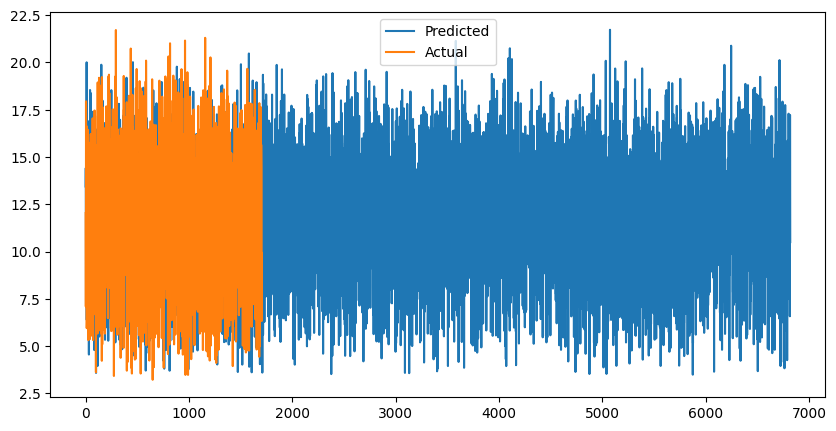

In [71]:
#Plotting the Figure
plt.figure(figsize=(10,5))
plt.plot(rf_T_pred)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.show()

XG Boost Regressor

In [72]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [73]:
XGB_T_pred = XGB.predict(X_train)
XGB_Pred = XGB.predict(X_test)

In [74]:
#score variables
XGB_MAE = round(mean_absolute_error(Y_test, XGB_Pred),2)
XGB_MSE = round(mean_squared_error(Y_test, XGB_Pred),2)
XGB_RMSE =np.sqrt(XGB_MSE)
XGB_R_2 = round(r2_score(Y_test, XGB_Pred),4)

print(f"Model score : {XGB.score(X_test,Y_test)}\n")
print(f" Mean Absolute Error: {XGB_MAE}\n")
print(f" Mean Squared Error: {XGB_MSE}\n")
print(f"Root Mean Squared Error:{XGB_RMSE}\n")
print(f" R^2 Score: {XGB_R_2}\n")

Model score : 0.6661457748469022

 Mean Absolute Error: 1.61

 Mean Squared Error: 4.24

Root Mean Squared Error:2.0591260281974

 R^2 Score: 0.6661



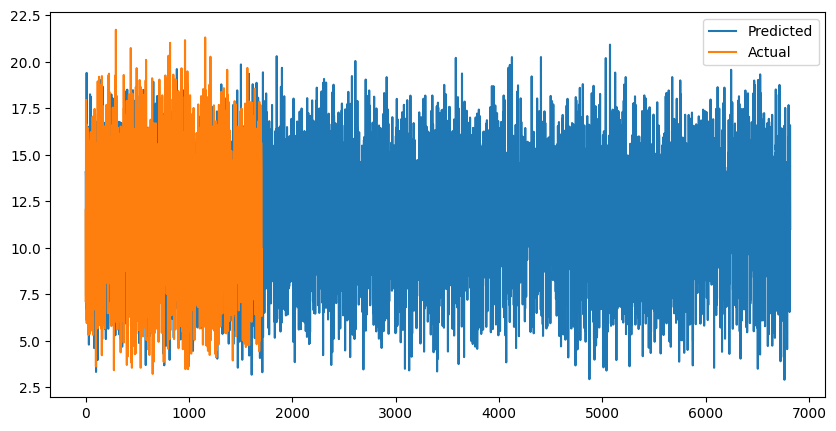

In [75]:
#Plotting the Figure
plt.figure(figsize=(10,5))
plt.plot(XGB_T_pred)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.show()

Gradient Boosting 

In [76]:
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(X_train,Y_train)

GradientBoostingRegressor()

In [77]:
GB_T_pred = GB.predict(X_train)
GB_Pred = GB.predict(X_test)

In [78]:
#score variables
GB_MAE = round(mean_absolute_error(Y_test, GB_Pred),2)
GB_MSE = round(mean_squared_error(Y_test, GB_Pred),2)
GB_RMSE =np.sqrt(GB_MSE)
GB_R_2 = round(r2_score(Y_test, GB_Pred),4)

print(f"Model score : {GB.score(X_test,Y_test)}\n")
print(f" Mean Absolute Error: {GB_MAE}\n")
print(f" Mean Squared Error: {GB_MSE}\n")
print(f"Root Mean Squared Error:{GB_RMSE}\n")
print(f" R^2 Score: {GB_R_2}\n")

Model score : 0.708480281247731

 Mean Absolute Error: 1.5

 Mean Squared Error: 3.7

Root Mean Squared Error:1.9235384061671346

 R^2 Score: 0.7085



* As We can see that Gradient Boost is accuracy score is 70% 
* Random Forest,XG Boost giving high accuracy around 68% - 67 %

We need to do Hyper Parameter Tuning for improve model accuracy

Hyper Parameter Tuning

In [79]:
param_search = {
    "n_estimators":[50,100,200,300],
    "max_depth":[6,8,10],
    "min_samples_split":[2,3,5],
    "min_samples_leaf" :[2,3,5],
    "max_features":["auto","sqrt","log2"]}

In [80]:
from sklearn.model_selection import RandomizedSearchCV
gb_model = GradientBoostingRegressor()
gb_randomsearch = RandomizedSearchCV(estimator=gb_model,
                       param_distributions=param_search,
                       n_iter = 150,
                       cv=2,verbose=2,
                       n_jobs=-1)
gb_randomsearch.fit(X_train,Y_train)

Fitting 2 folds for each of 150 candidates, totalling 300 fits


RandomizedSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'max_depth': [6, 8, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 5],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [50, 100, 200, 300]},
                   verbose=2)

In [81]:
gb_random = gb_randomsearch.best_estimator_

In [82]:
gb_randomsearch.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 6}

In [83]:
GB_Y_pred = gb_random.predict(X_test)

In [84]:
GB_R_2_Random = round(r2_score(Y_test, GB_Y_pred),4)
GB_R_2_Random

0.7062

Random Forest Hyper Parameter

In [85]:
#GridSearchCV for Random Forest
param_grid = {
    "n_estimators":[50,100,200],
    "max_depth":[4,6,8,10],
    "min_samples_split":[5,6,8],
    "min_samples_leaf" :[4,6,8],
    "max_features":["auto","sqrt","log2"]}

In [86]:
from sklearn.model_selection import GridSearchCV
RFR = RandomForestRegressor()
RFR_search = GridSearchCV(estimator=RFR,
                              param_grid=param_grid,
                              cv=2,
                              n_jobs=-1,
                              verbose=2)
RFR_search.fit(X_train,Y_train)

Fitting 2 folds for each of 324 candidates, totalling 648 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [5, 6, 8],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [87]:
RFR_Model = RFR_search.best_estimator_

In [88]:
RFR_search.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'min_samples_split': 5,
 'n_estimators': 200}

In [89]:
RFR_Y_Pred = RFR_Model.predict(X_test)

In [90]:
RFR_R_2_Grid = round(r2_score(Y_test, RFR_Y_Pred),4)
RFR_R_2_Grid

0.7082

XGB RandomSearch

In [91]:
from sklearn.model_selection import RandomizedSearchCV
XGB_model = XGBRegressor()
XGB_randomsearch = RandomizedSearchCV(estimator=XGB_model,
                       param_distributions=param_search,
                       n_iter = 150,
                       cv=2,verbose=2,
                       n_jobs=-1)
XGB_randomsearch.fit(X_train,Y_train)

Fitting 2 folds for each of 150 candidates, totalling 300 fits


RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=150, n_jobs=-1,
                   param_distributions={'max_depth': [6, 8, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 5],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [50, 100, 200, 300]},
                   verbose=2)

In [92]:
XGB_random = XGB_randomsearch.best_estimator_

In [93]:
XGB_random = XGB_randomsearch.best_estimator_

In [94]:
XGB_randomsearch.best_params_

{'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 6}

In [95]:
XGB_Y_Pred = XGB_random.predict(X_test)

In [96]:
XGB_R_2_Grid = round(r2_score(Y_test, XGB_Y_Pred),4)
XGB_R_2_Grid

0.685

Random Forest is High 